In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Câu 1:**
Sử dụng tập tin GroceryStore-AssociateRules.txt để thử nghiệm thuật toán Luật Kết Hợp.
Sinh viên tự chọn các giá trị ngưỡng!
** Sinh viên cần copy đoạn mã hóa one-hot encoding sẵn bên dưới ra file excel, đặt lại tên cột đầu tiên là TID rồi lưu thành file csv.

In [2]:
from numpy.lib.shape_base import column_stack
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

# Đọc dữ liệu từ tập tin
data = pd.read_csv('/content/drive/MyDrive/KPDL/TH4/input/orders.csv', sep=',')

# Chuyển đổi dữ liệu thành dạng One-Hot Encoding
data_encoded = data.drop('No', 1).applymap(lambda x: True if x == 1 else False)

# Áp dụng thuật toán Apriori để tìm các luật kết hợp
frequent_itemsets = apriori(data_encoded, min_support=0.1, use_colnames=True)

# Tìm các luật kết hợp dựa trên frequent itemsets và độ tin cậy
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
## Có thể điều chỉnh `min_threshold` tùy vào nhu cầu! Trong khoảng 0 -> 1 tương ứng với độ tin cậy của kết quả đầu ra
## Một giá trị ngưỡng cao sẽ tạo ra ít luật hơn nhưng có độ tin cậy cao, trong khi một giá trị ngưỡng thấp sẽ tạo ra nhiều luật hơn nhưng có độ tin cậy thấp.

# Lưu ra file csv
rules.to_excel("/content/drive/MyDrive/KPDL/TH4/output/test_res0.8.xlsx")
# In kết quả
print(rules)

<ipython-input-2-a76bc6d6eda3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_encoded = data.drop('No', 1).applymap(lambda x: True if x == 1 else False)


                      antecedents           consequents  antecedent support  \
0                           (JAM)               (BREAD)                0.10   
1                          (MILK)               (BREAD)                0.25   
2                          (COCK)              (COFFEE)                0.15   
3                           (JAM)               (MAGGI)                0.10   
4                         (MAGGI)                 (TEA)                0.25   
5                 (BISCUIT, MILK)               (BREAD)                0.10   
6                 (BISCUIT, COCK)              (COFFEE)                0.10   
7               (BISCUIT, COFFEE)                (COCK)                0.10   
8              (CORNFLAKES, COCK)             (BISCUIT)                0.10   
9                 (BISCUIT, COCK)          (CORNFLAKES)                0.10   
10              (BISCUIT, COFFEE)          (CORNFLAKES)                0.10   
11                 (BISCUIT, TEA)               (MAG

Dữ liệu kết quả sau khi áp dụng thuật toán Luật Kết Hợp lên tập dữ liệu gốc. Các cột trong dữ liệu được giải thích như sau:

  - antecedents: Tập các mặt hàng đứng trước trong luật kết hợp.
  - consequents: Tập các mặt hàng đứng sau trong luật kết hợp.
  - antecedent support: Tần suất xuất hiện của tập antecedents trong dữ liệu.
  - consequent support: Tần suất xuất hiện của tập consequents trong dữ liệu.
  - support: Tần suất xuất hiện của cả tập antecedents và consequents trong dữ liệu.
  - confidence: Độ tin cậy của luật kết hợp, tỷ lệ giữa support của tập antecedents và cả tập antecedents và consequents.
  - lift: Giá trị lift của luật kết hợp, đo lường mức độ phụ thuộc giữa antecedents và consequents. Lift cao hơn 1 cho thấy sự phụ thuộc tích cực, trong khi lift thấp hơn 1 cho thấy sự phụ thuộc tiêu cực.
  - leverage: Độ chênh lệch giữa sự xuất hiện thực tế và sự xuất hiện dự đoán của luật kết hợp.
  - conviction: Giá trị conviction của luật kết hợp, đo lường mức độ phụ thuộc giữa antecedents và consequents, đồng thời bỏ qua tần suất xuất hiện của consequents.
  - Mỗi dòng trong dữ liệu tương ứng với một luật kết hợp. Ví dụ, dòng đầu tiên cho thấy rằng luật kết hợp "BISCUIT" → "BREAD" có support là 0.2, confidence là 0.571428571 và lift là 0.879120879.

# Câu 2:

# Dùng Luật kết hợp với Apriori

In [5]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv("/content/drive/MyDrive/KPDL/TH4/input/diemthi_hcm.csv")

# Lọc ra các cột cần tính toán
df_khtn = df[["Toan", "Nguvan", "Ngoaingu", "Vatli", "Hoahoc", "Sinhhoc"]]

df_khtn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Toan,Nguvan,Ngoaingu,Vatli,Hoahoc,Sinhhoc
0,7.8,6.25,5.6,5.50,6.25,7.00
1,6.4,6.50,8.2,6.75,6.25,5.50
2,8.4,8.25,6.4,7.50,7.25,5.25
3,6.8,7.00,4.4,5.00,4.50,3.50
4,8.4,7.75,6.4,8.00,7.00,4.00
...,...,...,...,...,...,...
41945,9.0,8.25,7.2,7.25,7.50,6.25
41946,5.4,5.92,NaN,3.50,5.00,5.50
41947,8.6,7.00,6.2,8.25,8.75,6.75
41948,9.2,7.50,6.2,8.75,8.50,8.25


In [6]:
# Thay đổi điểm thi theo điều kiện
df_khtn = df_khtn.applymap(lambda x: 1 if x > 8.0 else 0)

print(df_khtn)

       Toan  Nguvan  Ngoaingu  Vatli  Hoahoc  Sinhhoc
0         0       0         0      0       0        0
1         0       0         1      0       0        0
2         1       1         0      0       0        0
3         0       0         0      0       0        0
4         1       0         0      0       0        0
...     ...     ...       ...    ...     ...      ...
41945     1       1         0      0       0        0
41946     0       0         0      0       0        0
41947     1       0         0      1       1        0
41948     1       0         0      1       1        1
41949     1       0         0      0       1        0

[41950 rows x 6 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Chuyển đổi dữ liệu thành dạng One-Hot Encoding
data_encoded = df_khtn.applymap(lambda x: True if x == 1 else False)

# Áp dụng thuật toán Apriori để tìm các luật kết hợp
frequent_itemsets = apriori(data_encoded, min_support=0.1, use_colnames=True)

# Tìm các luật kết hợp dựa trên frequent itemsets và độ tin cậy
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

print(rules)

rules.to_excel("demo.xlsx")

  antecedents consequents  antecedent support  consequent support   support  \
0      (Toan)  (Ngoaingu)            0.449106            0.142050  0.109058   
1  (Ngoaingu)      (Toan)            0.142050            0.449106  0.109058   
2      (Toan)    (Hoahoc)            0.449106            0.140906  0.118832   
3    (Hoahoc)      (Toan)            0.140906            0.449106  0.118832   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.242834  1.709499  0.045263    1.133107       0.753381  
1    0.767746  1.709499  0.045263    2.371949       0.483750  
2    0.264597  1.877826  0.055550    1.168194       0.848565  
3    0.843343  1.877826  0.055550    3.516559       0.544142  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Dùng luật kết hợp với FP Growth

In [8]:
! pip install pyfpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5489 sha256=4db2dd6fd30d6948d9ed3f53e09ba1e5ddbc4ea5ad4d17d982ad4a6e297e3bc5
  Stored in directory: /root/.cache/pip/wheels/09/fc/dc/afff211038bfc745722d8d7e846e854e5791968b22c570a530
Successfully built pyfpgrowth


In [9]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import pyfpgrowth

df = pd.read_csv("/content/drive/MyDrive/KPDL/TH4/input/diemthi_hcm.csv")
# Lọc ra các cột cần tính toán
df_khtn = df[["Toan", "Nguvan", "Ngoaingu", "Vatli", "Hoahoc", "Sinhhoc"]]

df_khtn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Toan,Nguvan,Ngoaingu,Vatli,Hoahoc,Sinhhoc
0,7.8,6.25,5.6,5.50,6.25,7.00
1,6.4,6.50,8.2,6.75,6.25,5.50
2,8.4,8.25,6.4,7.50,7.25,5.25
3,6.8,7.00,4.4,5.00,4.50,3.50
4,8.4,7.75,6.4,8.00,7.00,4.00
...,...,...,...,...,...,...
41945,9.0,8.25,7.2,7.25,7.50,6.25
41946,5.4,5.92,NaN,3.50,5.00,5.50
41947,8.6,7.00,6.2,8.25,8.75,6.75
41948,9.2,7.50,6.2,8.75,8.50,8.25


In [10]:
# Convert DataFrame to transactional format
transactions = df_khtn.apply(lambda row: [col for col, val in row.items() if val > 8], axis=1).tolist()

# Apply FP-Growth algorithm to find frequent itemsets
patterns = pyfpgrowth.find_frequent_patterns(transactions, 0.1)

# Generate association rules from frequent itemsets
rules = pyfpgrowth.generate_association_rules(patterns, 0.5)

# Print the discovered rules
for rule, support in rules.items():
    antecedent = ', '.join(rule)
    consequent = ', '.join(rules[rule][0])
    confidence = rules[rule][1]
    print(f"Rule: {antecedent} -> {consequent}")
    print(f"Support: {support}")
    print(f"Confidence: {confidence}")
    print()

# Nếu một sinh viên đạt điểm cao trong các môn <antecedance>, thì có khả năng cao sinh viên đó cũng đạt điểm cao trong môn <consequence>.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rule: Ngoaingu, Nguvan, Sinhhoc, Vatli -> Hoahoc, Toan
Support: (('Hoahoc', 'Toan'), 0.75)
Confidence: 0.75

Rule: Nguvan, Sinhhoc, Toan, Vatli -> Hoahoc
Support: (('Hoahoc',), 0.875)
Confidence: 0.875

Rule: Hoahoc, Ngoaingu, Nguvan, Sinhhoc, Vatli -> Toan
Support: (('Toan',), 1.0)
Confidence: 1.0

Rule: Ngoaingu, Nguvan, Sinhhoc, Toan, Vatli -> Hoahoc
Support: (('Hoahoc',), 0.75)
Confidence: 0.75

Rule: Hoahoc, Nguvan, Sinhhoc, Vatli -> Toan
Support: (('Toan',), 1.0)
Confidence: 1.0

Rule: Hoahoc, Ngoaingu, Nguvan, Sinhhoc -> Toan
Support: (('Toan',), 0.8888888888888888)
Confidence: 0.8888888888888888

Rule: Ngoaingu, Nguvan, Sinhhoc, Toan -> Hoahoc
Support: (('Hoahoc',), 0.8421052631578947)
Confidence: 0.8421052631578947

Rule: Hoahoc, Nguvan, Sinhhoc -> Toan
Support: (('Toan',), 0.9454545454545454)
Confidence: 0.9454545454545454

Rule: Nguvan, Sinhhoc, Toan -> Hoahoc
Support: (('Hoahoc',), 0.8813559322033898)
Confidence: 0.8813559322033898

Rule: Hoahoc, Nguvan, Vatli -> Toan
Suppo

# Dùng corr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

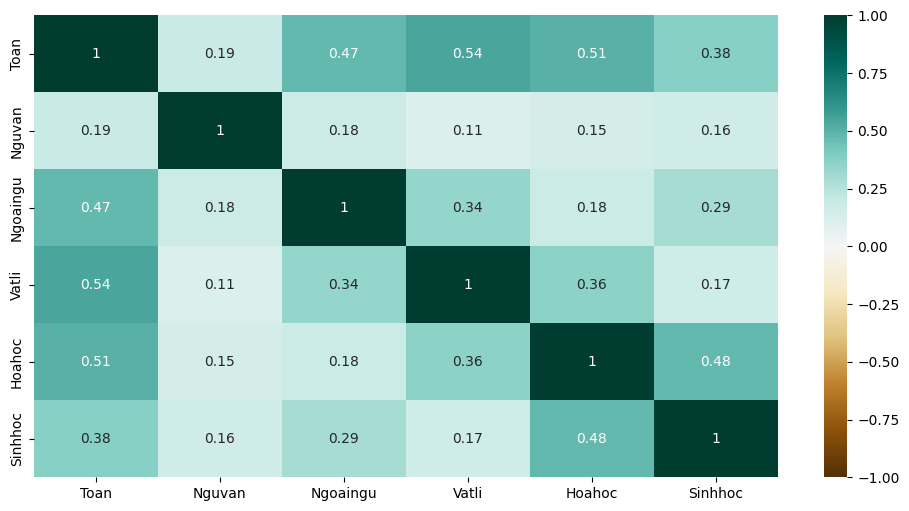

In [11]:
# Hệ số tương quan (Correlation Coefficient)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df[["Toan", "Nguvan", "Ngoaingu", "Vatli", "Hoahoc", "Sinhhoc"]].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')